In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [2]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 25.78 MiB | 12.06 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain 
from ktrain import text

In [4]:
#loading the train dataset
data_train = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)
data_train

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg
...,...,...
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg


In [5]:
data_test = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype = str)
data_test

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg
...,...,...
24995,This fanciful horror flick has Vincent Price p...,neg
24996,"The Intruder (L'Intrus), a film directed by Fr...",pos
24997,Holy crap. This was the worst film I have seen...,neg
24998,Clocking in at an interminable three hours and...,neg


In [6]:
data_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [7]:
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [8]:
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df = data_train,
                   text_column = "Reviews",
                   label_columns = "Sentiment"
                   ,val_df = data_test,
                   maxlen = 400,
                   preprocess_mode='bert',
                   )

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [9]:
X_train[0].shape

(25000, 400)

In [10]:
model = text.text_classifier(name="bert",
                             train_data = (X_train,y_train),
                              preproc = preprocess)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [11]:
#Get Learning Rate
learner = ktrain.get_learner(model = model,
                             train_data = (X_train,y_train),
                             val_data = (X_test,y_test),
                             batch_size = 6)

In [ ]:
# It is a time consuming 
# learner.lr_find()
# learner.lr_plot()

# Optimal Learning Rate for this model is 2e-5

In [12]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.8942

KeyboardInterrupt: ignored

In [13]:
predictor = ktrain.get_predictor(learner.model,preprocess)

In [14]:
data = ['this movie was horrible, the plot was really boring.Acting was okay,though.',
        'the film really sucked, there is no plot and acting was bad',
        'what a beautiful movie. great plot,great acting, will see it again']

In [15]:
predictor.predict(data)

['neg', 'neg', 'pos']

In [16]:
predictor.predict(data, return_proba=True)

array([[0.9982041 , 0.00179593],
       [0.9985341 , 0.00146597],
       [0.00337045, 0.99662954]], dtype=float32)

In [17]:
predictor.get_classes()

['neg', 'pos']

In [21]:
learner.validate(val_data=(X_test, y_test), class_names=['neg', 'pos'])

782/782 [==============================] - 808s 1s/step
              precision    recall  f1-score   support

         neg       0.97      0.96      0.96     12500
         pos       0.96      0.97      0.97     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



array([[11981,   519],
       [  359, 12141]])

In [23]:
learner.validate(val_data=(X_train, y_train), class_names=['neg', 'pos'])

782/782 [==============================] - 807s 1s/step
              precision    recall  f1-score   support

         neg       0.97      0.96      0.96     12500
         pos       0.96      0.97      0.97     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



array([[11981,   519],
       [  359, 12141]])

# EXPLORATORY DATA ANALYSIS


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] =[10,5]
plt.rcParams['figure.dpi']=120

Text(0.5, 1.0, 'Positive or Negative Sentiments')

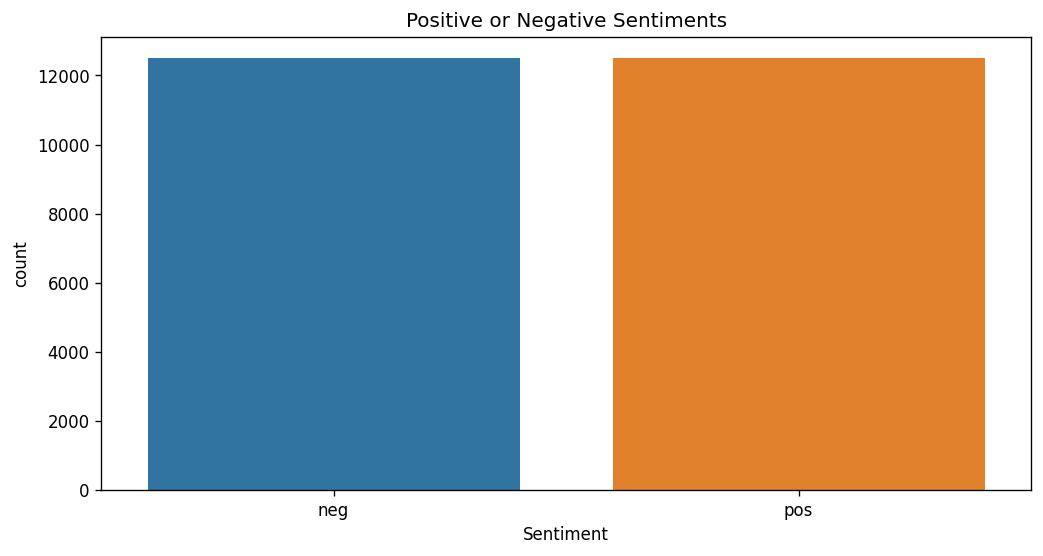

In [ ]:
sns.countplot('Sentiment',data=data_train)
plt.title('Positive or Negative Sentiments')

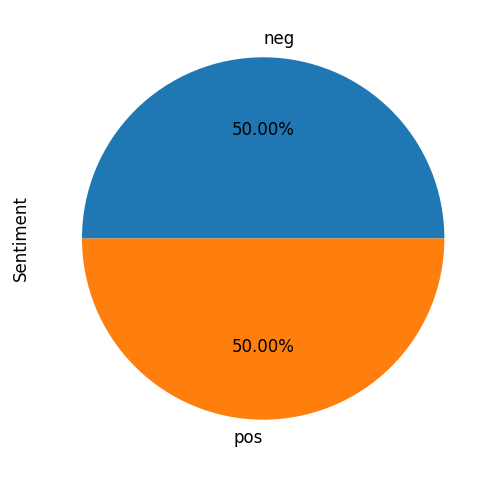

In [ ]:
data_train['Sentiment'].value_counts().plot.pie(autopct="%1.2f%%")